<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_11_Post_Purchase_NPS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Studi Kasus 11 : Post Purchase NPS Analysis**##

Bayangkan sebuah e-commerce fashion bernama **StyleHub**, yang menjual pakaian trendi untuk anak muda. Selama setahun terakhir, StyleHub mengalami peningkatan jumlah pelanggan baru berkat strategi pemasaran yang kreatif. Tapi, ada masalah besar: **hanya 15% pelanggan yang melakukan pembelian kedua.**

Tim manajemen mulai khawatir. Mereka bertanya-tanya, "Kenapa banyak pelanggan tidak kembali setelah membeli? Apakah produknya tidak sesuai? Apakah ada masalah di layanan pelanggan?"

Tim Data Analytics StyleHub memutuskan untuk melakukan survei **Post Purchase NPS Analysis**. Survei ini dikirim melalui email kepada pelanggan **7 hari setelah mereka menerima produk**, dengan pertanyaan utama:

"Seberapa besar kemungkinan Anda merekomendasikan StyleHub kepada teman atau keluarga? (0-10)"

Selain itu, mereka juga menambahkan pertanyaan terbuka:
1. Apa yang Anda sukai dari pengalaman Anda?
2. Apa yang perlu kami tingkatkan?


## **Step 01 : Business Problem**##

**StyleHub** mengalami tingkat retensi pelanggan yang rendah, dengan hanya 15% pelanggan yang melakukan pembelian kedua. Hal ini menunjukkan bahwa banyak pelanggan yang tidak puas atau merasa pengalaman pembelian tidak memenuhi harapan mereka, sehingga mereka enggan untuk kembali. Masalah ini memengaruhi pertumbuhan bisnis, terutama karena biaya untuk mengakuisisi pelanggan baru lebih tinggi dibandingkan mempertahankan pelanggan lama.

##**Step 02 : Analysis Objective**

1. Mengidentifikasi penyebab utama mengapa pelanggan tidak kembali setelah pembelian pertama.
2. Menentukan area yang memerlukan perbaikan, seperti kualitas produk, pengiriman, atau layanan pelanggan.
3. Memberikan rekomendasi berbasis data untuk meningkatkan pengalaman pelanggan dan retensi mereka, dengan target meningkat


##**Step 03 : Key Questions**

1. Apa penyebab utama pelanggan memberikan skor NPS rendah (Detractor)?
2. Apakah ada pola tertentu pada pelanggan yang puas (Promoter) dibandingkan yang tidak puas?
3. Faktor apa yang paling sering disebutkan dalam feedback pelanggan terkait ketidakpuasan (warna produk, pengiriman, ukuran, dll.)?


##**Step 04 : Data Findings**

In [29]:
import pandas as pd

file_path = "https://drive.google.com/uc?export=download&id=1fguPCrThby4U-FjkxERyyDjw8g9alsyS"
dataset = pd.read_csv(file_path)
dataset.head()


,Customer_ID,Purchase_Date,NPS_Score,Category,Feedback
0,1,2024-01-01,10,Promoter,Perfect! Akan beli lagi di sini.
1,2,2024-01-02,1,Detractor,"Pengiriman sangat lambat, tidak ada update."
2,3,2024-01-03,0,Detractor,"Pengiriman sangat lambat, tidak ada update."
3,4,2024-01-04,4,Detractor,Pengalaman sangat mengecewakan.
4,5,2024-01-05,3,Detractor,Pelayanan customer service lambat.


In [30]:
# Filter Dataset For Detractor (NPS_Score 0-6)
detractor = dataset[dataset["NPS_Score"] <= 6]

In [31]:
#  Analyze feedback to identify the most common reasons for low NPS scores
feedback_summary = detractor["Feedback"].value_counts()

In [32]:
# Display the top reasons
feedback_summary.head(10)

,count
Feedback,
"Ukuran terlalu kecil, tabel ukuran tidak jelas.",22
"Pengiriman sangat lambat, tidak ada update.",18
"Warna tidak sesuai, beda dengan foto.",18
Pengalaman belanja yang buruk.,17
Pelayanan customer service lambat.,14
Kemasan rusak saat diterima.,14
Pengalaman sangat mengecewakan.,13
"Barang cacat saat diterima, kurang puas.",12


### **1. Apa penyebab utama pelanggan memberikan skor NPS rendah (Detractor)?**

In [33]:
import matplotlib.pyplot as plt

In [34]:
# Select the top reasons for low NPS scores
top_reasons = feedback_summary.head(8)

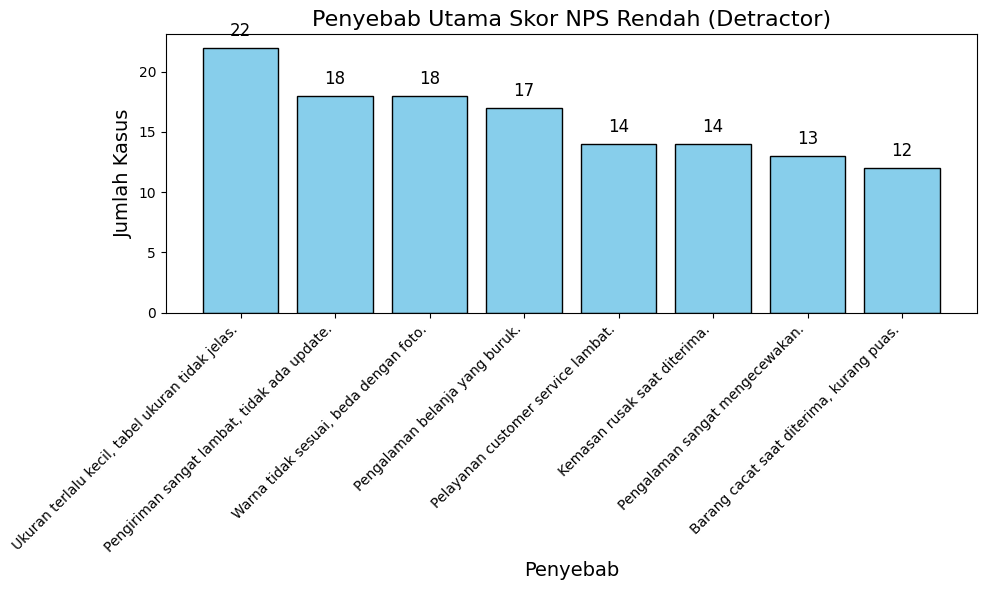

In [35]:
# Create a bar chart with values labeled on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_reasons.index, top_reasons.values, color="skyblue", edgecolor="black")

# Add values on top of each bar
for bar in bars:
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
           str(bar.get_height()), ha="center", fontsize=12)

# Add titles and labels
plt.title("Penyebab Utama Skor NPS Rendah (Detractor)", fontsize=16)
plt.xlabel("Penyebab", fontsize=14)
plt.ylabel("Jumlah Kasus", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


###**2. Apakah ada pola tertentu pada pelanggan yang puas (Promoter) dibandingkan yang tidak puas?**

In [36]:
# Filter the dataset for Promoters (NPS_Score 9-10) and Detractors (NPS_Score 0-6)
promoters = dataset[dataset["NPS_Score"] >= 9]
detractors = dataset[dataset["NPS_Score"] <= 6]

In [37]:
# Analyze potential patterns by comparing summary statistics and feedback
promoters_summary = promoters.describe(include="all")
detractors_summary = promoters.describe(include="all")

In [38]:
# Compare key attributes between Promoters and Detractors
feedback_promoters = promoters["Feedback"].value_counts()
feedback_detractors = detractors["Feedback"].value_counts()

promoters_summary, feedback_promoters.head(5), feedback_detractors.head(5)

(        Customer_ID Purchase_Date  NPS_Score  Category  \
 count     38.000000            38  38.000000        38   
 unique          NaN            38        NaN         1   
 top             NaN    2024-01-01        NaN  Promoter   
 freq            NaN             1        NaN        38   
 mean     100.789474           NaN   9.578947       NaN   
 std       55.581038           NaN   0.500355       NaN   
 min        1.000000           NaN   9.000000       NaN   
 25%       59.000000           NaN   9.000000       NaN   
 50%       99.000000           NaN  10.000000       NaN   
 75%      144.500000           NaN  10.000000       NaN   
 max      200.000000           NaN  10.000000       NaN   
 
                                              Feedback  
 count                                              38  
 unique                                              5  
 top     Pengiriman cepat, suka banget sama produknya!  
 freq                                               11  
 mean

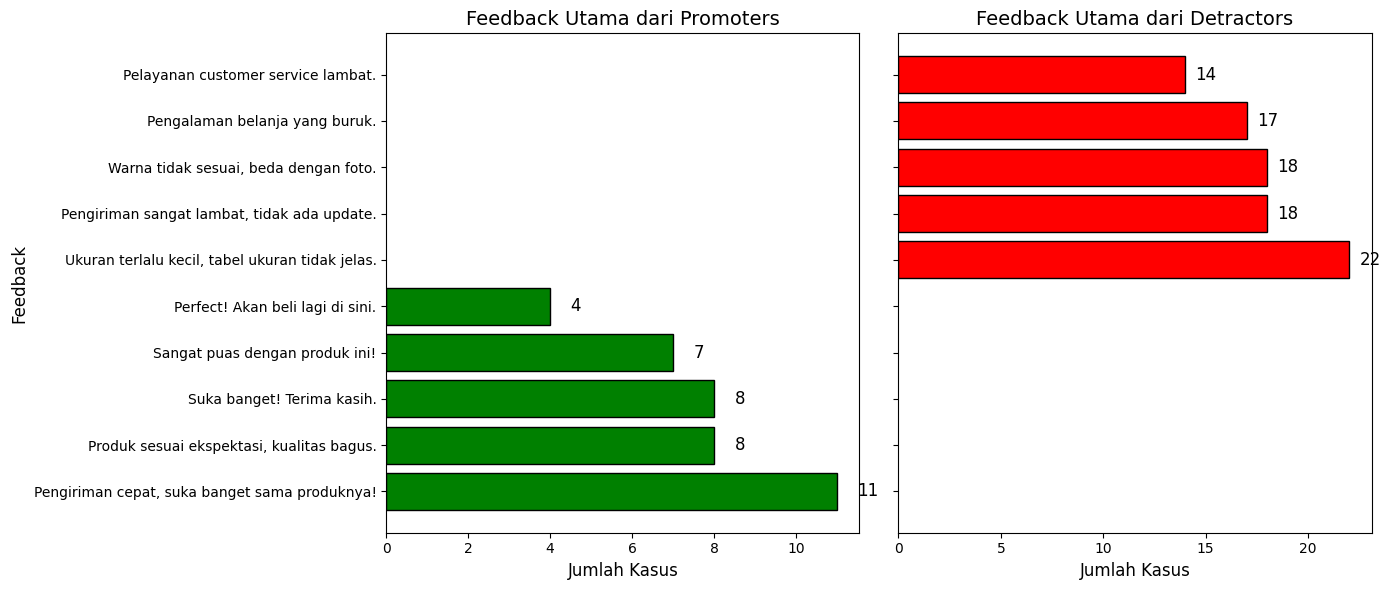

In [39]:
# Create side-by-side bar charts with values for top feedback from Promoters and Detractors
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Promoters feedback visualization
bars_promoters = axes[0].barh(feedback_promoters.index[:5], feedback_promoters.values[:5], color="green", edgecolor="black")
axes[0].set_title("Feedback Utama dari Promoters", fontsize=14)
axes[0].set_xlabel("Jumlah Kasus", fontsize=12)
axes[0].set_ylabel("Feedback", fontsize=12)
for bar in bars_promoters:
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va="center", fontsize=12)

# Detractors feedback visualization
bars_detractors = axes[1].barh(feedback_detractors.index[:5], feedback_detractors.values[:5], color="red", edgecolor="black")
axes[1].set_title("Feedback Utama dari Detractors", fontsize=14)
axes[1].set_xlabel("Jumlah Kasus", fontsize=12)
for bar in bars_detractors:
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), va="center", fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Dari analisis dataset, berikut adalah pola utama yang ditemukan pada pelanggan Promoter dibandingkan dengan Detractor:

**Karakteristik Promoter:**

1. Distribusi Skor:

  - Skor NPS untuk Promoters adalah 9 atau 10, dengan rata-rata 9.58.
  - Mereka memberikan feedback positif seperti:** "Pengiriman cepat, suka banget sama produknya!" (11 kasus).** "Produk sesuai ekspektasi, kualitas bagus." (8 kasus).** "Sangat puas dengan produk ini!" (7 kasus).

2. Fokus Positif:

  - Promoters sering memuji pengiriman cepat dan kualitas produk yang sesuai ekspektasi.
  - Tingkat kepuasan mereka juga sering dipengaruhi oleh pelayanan yang tepat waktu dan kemudahan proses.

**Karakteristik Detractor:**

1. Distribusi Skor:

  - Skor NPS untuk Detractors berkisar antara 0 hingga 6, dengan keluhan dominan terkait:** "Ukuran terlalu kecil, tabel ukuran tidak jelas." (22 kasus).** "Pengiriman sangat lambat, tidak ada update." (18 kasus).** "Warna tidak sesuai, beda dengan foto." (18 kasus).

2. Fokus Negatif:

  - Detractors menunjukkan pola ketidakpuasan pada keakuratan produk (warna dan ukuran) serta pengalaman logistik (pengiriman lambat dan kemasan rusak).
  - Keluhan mereka sering mencerminkan ketidaknyamanan dalam keseluruhan pengalaman belanja.

**Kesimpulan Pola:**

1.   Promoters cenderung menghargai pengiriman yang cepat dan kualitas produk yang sesuai dengan ekspektasi.
2.   Detractors seringkali tidak puas dengan aspek-aspek teknis seperti ukuran, warna produk, serta kualitas layanan pelanggan dan logistik.
3. Pola Utama: Perbedaan utama terletak pada kecepatan pengiriman dan kesesuaian produk dengan ekspektasi pelanggan. Meningkatkan kedua aspek ini dapat meningkatkan jumlah Promoters dan mengurangi Detractors.

###**3.  Faktor apa yang paling sering disebutkan dalam feedback pelanggan terkait ketidakpuasan (warna produk, pengiriman, ukuran, dll.)?**

In [40]:
from collections import Counter

In [41]:
# Extract all feedback from detractors
detractor_feedback = detractors["Feedback"]

In [42]:
# Define potential factors
factors = ["warna", "pengiriman", "ukuran", "kemasan", "pelayanan", "cacat", "pengalaman"]

In [43]:
# Count occurrences of each factor in feedback
factor_counts = Counter()
for feedback in detractor_feedback:
  for factor in factors:
    if factor in feedback.lower():
      factor_counts[factor] += 1

# Convert to a sorted list
factor_counts = sorted(factor_counts.items(), key=lambda x: x[1], reverse=True)

# Display resualts
factor_counts

[('pengalaman', 30),
 ('ukuran', 22),
 ('pengiriman', 18),
 ('warna', 18),
 ('pelayanan', 14),
 ('kemasan', 14),
 ('cacat', 12)]

In [44]:
# Prepare data for visualization
factors, counts = zip(*factor_counts)

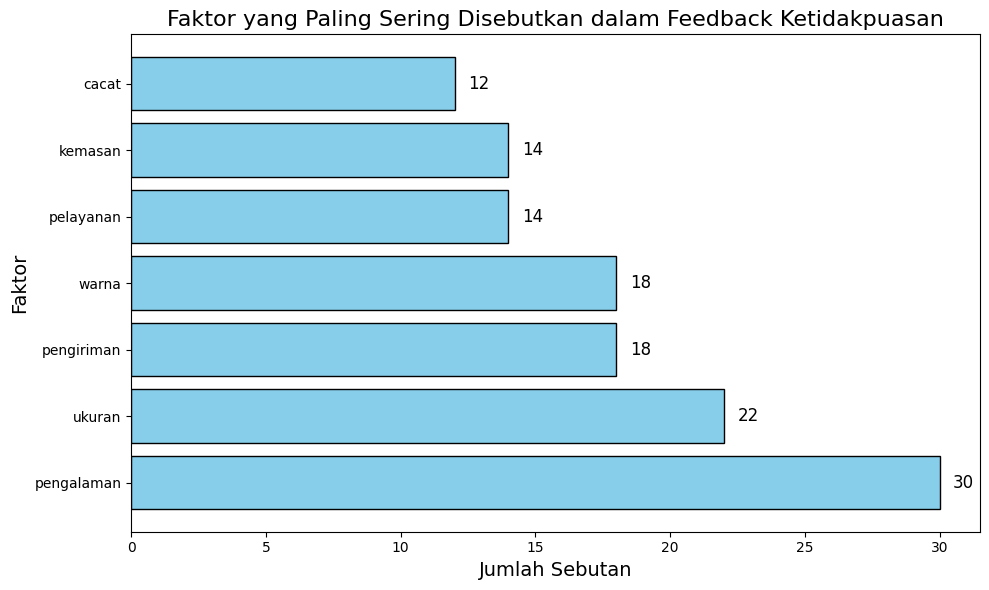

In [45]:
# Create a bar chart for factors mentioned in feedback
plt.figure(figsize=(10, 6))
bars = plt.barh(factors, counts, color="skyblue", edgecolor="black")

# Add values on each bar
for bar in bars:
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center', fontsize=12)

# Add titles and labels
plt.title("Faktor yang Paling Sering Disebutkan dalam Feedback Ketidakpuasan", fontsize=16)
plt.xlabel("Jumlah Sebutan", fontsize=14)
plt.ylabel("Faktor", fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan analisis feedback pelanggan terkait ketidakpuasan (Detractors), berikut adalah faktor yang paling sering disebutkan:


* Pengalaman - 30 kasus.
* Ukuran - 22 kasus.
* Pengiriman - 18 kasus.
* Warna - 18 kasus.
* Pelayanan - 14 kasus.
* Kemasan - 14 kasus.
* Cacat - 12 kasus.

Fokus perbaikan dapat diarahkan pada pengalaman pelanggan secara keseluruhan, dengan perhatian khusus pada akurasi ukuran produk, kecepatan pengiriman, dan kesesuaian warna.

##**Step 05: Business Implication**

**Strategic Implications**
1. Skor NPS rendah pada kategori Detractor menunjukkan risiko terhadap reputasi dan loyalitas pelanggan. Pelanggan yang tidak puas dapat memengaruhi pelanggan potensial melalui ulasan negatif.
2. Dengan retensi pelanggan yang hanya 15%, perusahaan kehilangan peluang untuk memperoleh pendapatan berulang. Fokus pada meningkatkan retensi hingga 30% dapat memberikan kontribusi signifikan terhadap stabilitas pendapatan jangka panjang.

**Operational Implications**
1. Feedback pelanggan menunjukkan bahwa produk, pengiriman, dan layanan memiliki celah yang memengaruhi kepuasan. Proses internal seperti kontrol kualitas produk, logistik, dan layanan pelanggan perlu dioptimalkan.
2. Waktu pengiriman lambat dan pengelolaan keluhan pelanggan yang kurang responsif memperlambat kemampuan StyleHub untuk memberikan pengalaman belanja yang menyenangkan.

**Financial Implications**
1. Dengan rendahnya tingkat pembelian kedua, biaya akuisisi pelanggan menjadi kurang efisien. Tingkat retensi yang lebih tinggi akan mengurangi ketergantungan pada akuisisi pelanggan baru.
2. Pelanggan yang tidak puas dapat menyebabkan kerugian finansial melalui penurunan penjualan berulang dan biaya kompensasi untuk mengatasi keluhan.

##**Step 06 : Recommendations**

**Tahap Produk**

Masalah yang Ditemukan:
1. Ketidakcocokan warna dengan foto produk.
2. Ukuran produk yang tidak sesuai dengan tabel ukuran.
3. Produk cacat saat diterima.

Langkah Perbaikan:

Foto Produk yang Akurat:
1. Gunakan fotografi berkualitas tinggi dengan pencahayaan yang tepat untuk memastikan warna produk terlihat sesuai.
2. Tambahkan fitur zoom pada gambar produk di website untuk detail yang lebih jelas.

Panduan Ukuran yang Lebih Jelas:
1. Perbaiki tabel ukuran dengan deskripsi rinci dan contoh nyata.
2. Sertakan video atau gambar pelanggan menggunakan produk untuk menunjukkan kecocokan ukuran.

Kontrol Kualitas yang Ketat:
1. Perbaiki proses quality control sebelum produk dikirim ke pelanggan.
2. Tambahkan inspeksi manual untuk produk dengan tingkat pengembalian tinggi.

**Tahap Pengiriman**

Masalah yang Ditemukan:
1. Pengiriman lambat dan kurang transparan.
2. Kemasan rusak saat diterima.

Langkah Perbaikan:

Optimalkan Mitra Logistik:
1. Pilih mitra logistik dengan reputasi baik untuk kecepatan dan keandalan.
2. Negosiasikan SLA (Service Level Agreement) untuk memastikan pengiriman tepat waktu.

Tambahkan Fitur Pelacakan Real-Time:
1. Integrasikan fitur pelacakan pengiriman di aplikasi atau website.
2. Kirim notifikasi otomatis kepada pelanggan mengenai status pengiriman.

Kemasan yang Tangguh dan Profesional:
1. Gunakan bahan kemasan yang lebih kuat untuk menghindari kerusakan selama transit.
2. Tambahkan elemen branding pada kemasan untuk memberikan kesan profesional.
